### Compute metrics based on reverb part of audios

In [38]:
################## IMPORT LIBRARIES ##################
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import soundfile as sf
from IPython.display import Audio, display, HTML
import torch
from os.path import join as pjoin
import random


In [43]:
################## IMPORT MY MODULES ##################
sys.path.append('../src')

import helpers as hlp
import evaluation
import dataset as ds
import trainer
import models
import loss_mel, loss_stft, loss_waveform, loss_embedd

importlib.reload(evaluation)
importlib.reload(hlp)
importlib.reload(ds)
importlib.reload(trainer)
importlib.reload(models)
importlib.reload(loss_mel)
importlib.reload(loss_stft)
importlib.reload(loss_waveform)
importlib.reload(loss_embedd)


<module 'loss_embedd' from '/home/ubuntu/joanna/reverb-match-cond-u-net/notebooks/../src/loss_embedd.py'>

In [44]:
# PREPARE EVALUATION SCRIPTS

config=hlp.load_config(pjoin("/home/ubuntu/joanna/reverb-match-cond-u-net/config/basic.yaml"))
# instantiate a test data set 
config["split"]="test"
dataset=ds.DatasetReverbTransfer(config)

myeval = evaluation.Evaluator(config)


2024-10-22 17:34:29 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-10-22 17:34:29 | INFO     | DF | Using DeepFilterNet3 model at /home/ubuntu/.cache/DeepFilterNet/DeepFilterNet3
2024-10-22 17:34:29 | INFO     | DF | Initializing model `deepfilternet3`
2024-10-22 17:34:29 | INFO     | DF | Found checkpoint /home/ubuntu/.cache/DeepFilterNet/DeepFilterNet3/checkpoints/model_120.ckpt.best with epoch 120
2024-10-22 17:34:29 | INFO     | DF | Running on device cuda:0
2024-10-22 17:34:29 | INFO     | DF | Model loaded
Preparing to evaluate 1000 test datapoints


In [45]:
# COMPUTE AND SAVE TO WAV ALL VERSIONS OF A DATAPOINT (GROUND TRUTH, BASELINE, OUR MODEL PREDICTIONS)

# which data point to use
dp_idx=46
wavsavedir="../sounds/report_151024/"
resave=True

# make a list of checkpoints to compare (in addition to ground truth sounds and baselines)
checkpoint_paths=[
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/10-06-2024--15-02_c_wunet_stft+wave_0.8_0.2/checkpointbest.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/20-05-2024--22-48_c_wunet_logmel+wave_0.8_0.2/checkpointbest.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/29-05-2024--05-47_c_wunet_logmel_1/checkpointbest.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/18-06-2024--18-37_c_wunet_stft_1/checkpointbest.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/18-06-2024--18-37_c_wunet_stft_1/checkpoint50.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/18-06-2024--18-37_c_wunet_stft_1/checkpoint10.pt",
                  "/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/18-06-2024--18-37_c_wunet_stft_1/checkpoint0.pt"
                  ]

sigs={}
filenames={}

sigs_gt,filenames_gt=myeval.save_audios_sample_ext("groundtruth",dp_idx,wavsavedir,savefiles=resave)
sigs.update(sigs_gt)
filenames.update(filenames_gt)
sigs_bl,filenames_bl=myeval.save_audios_sample_ext("baselines",dp_idx,wavsavedir,savefiles=resave)
sigs.update(sigs_bl)
filenames.update(filenames_bl)


for i, checkpoint_path in enumerate(checkpoint_paths):
    sigs_chckpt,filenames_chckpt=myeval.save_audios_sample_ext(checkpoint_path,dp_idx,wavsavedir,savefiles=resave)
    sigs.update(sigs_chckpt)
    filenames.update(filenames_chckpt)



getting ground truth signals
getting baseline signals
getting checkpoint signals
getting checkpoint signals
getting checkpoint signals
getting checkpoint signals
getting checkpoint signals
getting checkpoint signals
getting checkpoint signals


In [73]:
hlp.init_random_seeds(0)

sigs, rirs = dataset.get_item_test(46,truncate_rirs=True)

sigs

{'sContent': tensor([[-0.0444, -0.0035,  0.0348,  ...,  0.0000,  0.0000,  0.0000]]),
 'sContent_early': tensor([[-0.0444, -0.0040,  0.0350,  ...,  0.0000,  0.0000,  0.0000]]),
 'sContent_late': tensor([[ 9.7197e-09,  4.1318e-04, -1.4945e-04,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]]),
 'sTargetClone': tensor([[-0.0468, -0.0037,  0.0367,  ...,  0.0000,  0.0000,  0.0000]]),
 'sTargetClone_early': tensor([[-0.0468, -0.0042,  0.0369,  ...,  0.0000,  0.0000,  0.0000]]),
 'sTargetClone_late': tensor([[-3.7941e-08,  4.3547e-04, -1.5753e-04,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]]),
 'sTarget': tensor([[-0.0563, -0.0045,  0.0442,  ...,  0.0000,  0.0000,  0.0000]]),
 'sTarget_early': tensor([[-0.0563, -0.0050,  0.0444,  ...,  0.0000,  0.0000,  0.0000]]),
 'sTarget_late': tensor([[-4.5661e-09,  5.2404e-04, -1.8959e-04,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]]),
 'sStyle': tensor([[-1.3725e-07,  1.0558e-07, -2.5867e-07,  ..., -4.7072e-02,
          -4.

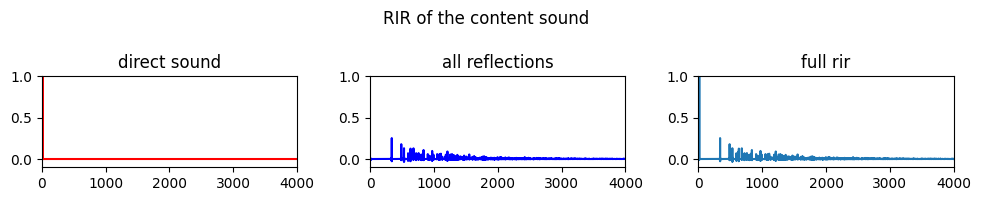

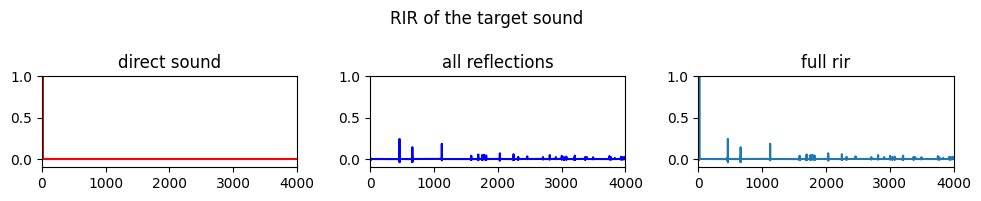

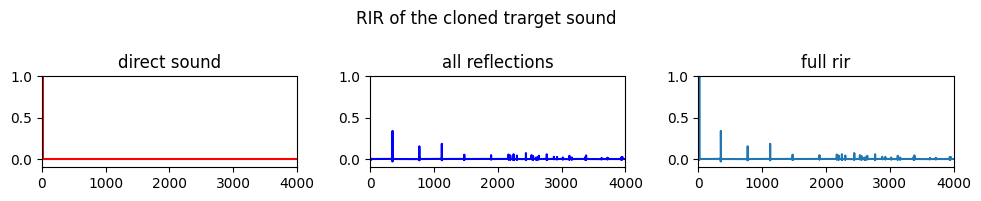

In [50]:
def plot_rirs(early, late, together,suptitle):
    plt.figure(figsize=(10,2))
    plt.subplot(1,3,1); plt.plot(early.T, color="red"); plt.xlim([0,4000]) ; plt.ylim([-0.1,1]); plt.title("direct sound")
    plt.subplot(1,3,2); plt.plot(late.T, color="blue") ; plt.xlim([0,4000]) ; plt.ylim([-0.1,1]) ;plt.title("all reflections")
    plt.subplot(1,3,3); plt.plot(together.T); plt.xlim([0,4000]) ; plt.ylim([-0.1,1]) ;plt.title("full rir")
    plt.suptitle(suptitle);plt.tight_layout();plt.show() 

plot_rirs(rirs["rirContent_early"].numpy(),rirs["rirContent_late"].numpy(),rirs["rirContent"].numpy(), "RIR of the content sound")
plot_rirs(rirs["rirTarget_early"].numpy(),rirs["rirTarget_late"].numpy(),rirs["rirTarget"].numpy(), "RIR of the target sound")
plot_rirs(rirs["rirTargetClone_early"].numpy(),rirs["rirTargetClone_late"].numpy(),rirs["rirTargetClone"].numpy(), "RIR of the cloned trarget sound")

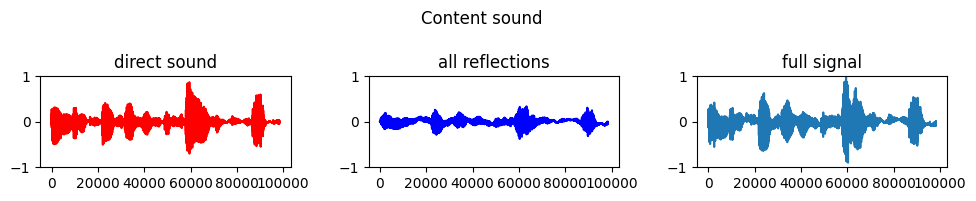

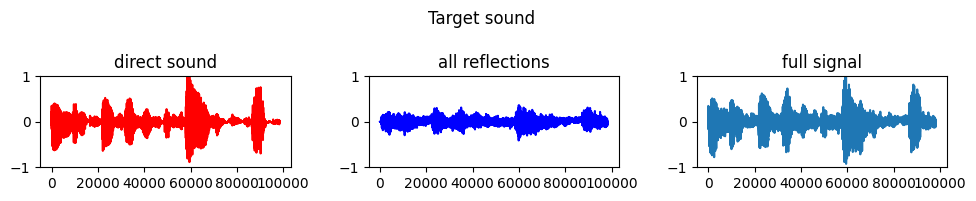

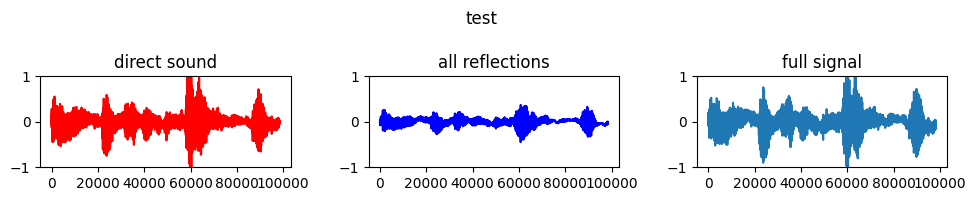

In [80]:
def plot_sigs(early, late, together, suptitle):
    plt.figure(figsize=(10,2))
    plt.subplot(1,3,1); plt.plot(early.T, color="red"); plt.ylim(-1,1); plt.title("direct sound")
    plt.subplot(1,3,2); plt.plot(late.T, color="blue"); plt.ylim(-1,1); plt.title("all reflections")
    plt.subplot(1,3,3); plt.plot(together.T); plt.ylim(-1,1); plt.title("full signal")
    plt.suptitle(suptitle);plt.tight_layout();plt.show() 

def audio_3_sigs(early,late, together):
    au1=Audio(early,rate=48000)
    au2=Audio(late,rate=48000)
    au3=Audio(together,rate=48000)
    display(HTML(f"""
    <div style="display: flex; space-between;">
        <div>{au1._repr_html_()}</div>
        <div>{au2._repr_html_()}</div>
        <div>{au3._repr_html_()}</div>
    </div>
    """))

plot_sigs(sigs["sContent_early"].numpy(),sigs["sContent_late"].numpy(),sigs["sContent"].numpy(), "Content sound")
audio_3_sigs(sigs["sContent_early"].numpy(),sigs["sContent_late"].numpy(),sigs["sContent"].numpy())

plot_sigs(sigs["sTarget_early"].numpy(),sigs["sTarget_late"].numpy(),sigs["sTarget"].numpy(), "Target sound")
audio_3_sigs(sigs["sTarget_early"].numpy(),sigs["sTarget_late"].numpy(),sigs["sTarget"].numpy())

# early=sigs["sContent"].numpy()-sigs["sTarget_late"].numpy()
# late=sigs["sContent"].numpy()-sigs["sTarget_early"].numpy()
# full=early+late
# plot_sigs(early,late,full, "test")
# audio_3_sigs(early,late,full)


We have the ground truth of the early and late part of the target signal. 

Now we can subtract the ground truth direct part from the predicted signal (or content, or any other signal we are interested in)



In [47]:
# sigs["sTargetClone"].numpy() - sigs["sTarget_early"].numpy() compare with  sigs["sTarget_late"].numpy() 
# sigs["sTarget"].numpy() - sigs["sTarget_early"].numpy()  compare with  sigs["sTarget_late"].numpy() 

torch.Size([1, 98304])

-0.00028664406


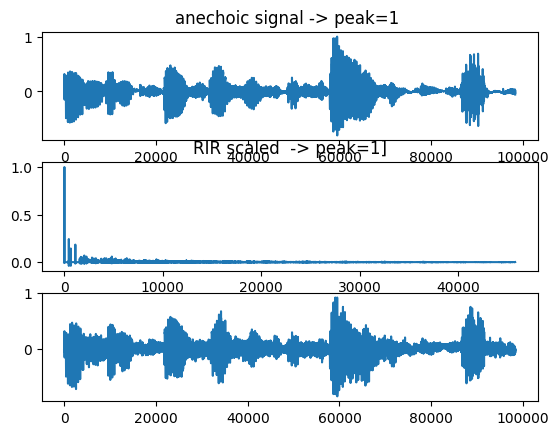

In [70]:
sigs["sContent"].numpy()
import scipy.signal as sig
a= sig.fftconvolve(sigs["sTargetClone"].numpy()), rirs["rirTarget"].numpy(), mode="full")[:,:98304]


print(np.mean(sigs["sAnecho"].numpy()))

plt.subplot(3,1,1);plt.plot(sigs["sAnecho"].numpy().T); plt.title("anechoic signal -> peak=1 ")
plt.subplot(3,1,2);plt.plot(rirs["rirTarget"].numpy().T); plt.title("RIR scaled  -> peak=1]")
plt.subplot(3,1,3);plt.plot(a.T)
plt.show()
display(Audio(a,rate=48000))

